# 교재 7장~
출처: 모두의 딥러닝

# 1. 퍼셉트론
- 퍼셉트론의 한계와 이를 해결하는 과정을 보며 신경망의 기본 개념을 보자

### 1-1. XOR문제

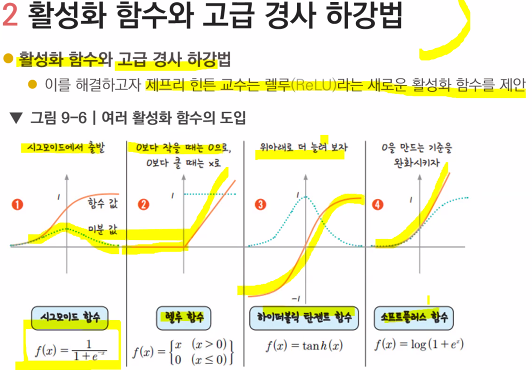

# 2. 옵티마이저
### 2-1.확률적 경사 하강법(Stochastic Gradient Descent, SGD)

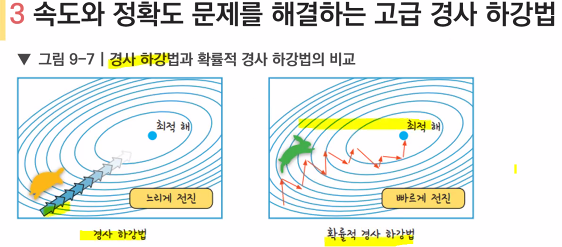

### 2-2. 모멘텀 SGD - 경사 하강법에 탄력을 더해 주는 것

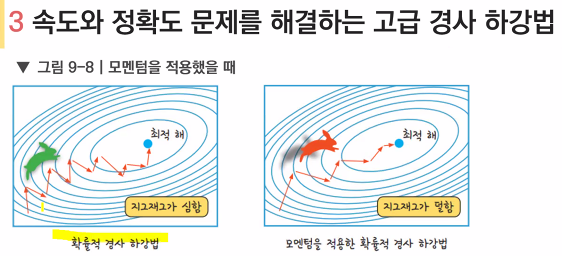

### 2-3. 아담(Adam) - 정확도와 속도를 모두 향상시킴. 잘 모르겠으면 그냥 Adam쓰라.

### 2-4. 전체적인 모양


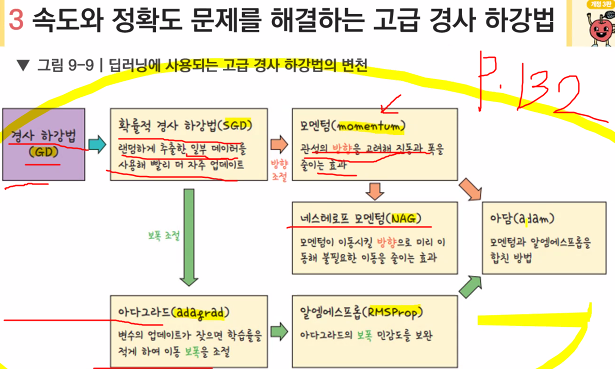


# 3. 실습1 - 당뇨병

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
df = pd.read_csv('../data/pima-indians-diabetes3.csv')

In [14]:
X = df.iloc[:,0:8]
y = df.iloc[:,8] # 당뇨병 여부
X.shape # 768 x 8
y.shape # 768 x 1
X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1')) # 8(입력) * 12(출력) + 12(bias) = 108
model.add(Dense(8, activation='relu', name='Dense_2')) # 12(이전 출력) * 8(출력) + 8(출력) = 104
model.add(Dense(1, activation='sigmoid', name='Dense_3')) # 8(이전 출력) + 1(출력) = 9 마지막은 sigmoid라 없음
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델을 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델을 실행
history = model.fit(X, y, epochs=100, batch_size=5)

# 3. 실습2 - 아이리스

In [16]:
df = pd.read_csv('../data/iris3.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [21]:
y = pd.get_dummies(y) # one - hot encoding
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [22]:
# 모델설정
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu')) # 입력층 x 출력층 + bias = 4 x 12 + 12 = 60
model.add(Dense(8, activation='relu')) # 입력층 x 출력층 + bias = 12 x 8 + 8 = 104
model.add(Dense(3, activation='softmax')) # 입력층 x 출력층 + bias = 8 x 3 + 3 = 27
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy'
             ,optimizer='adam'
             ,metrics=['accuracy'])
# 모델 실행
history = model.fit(X, y, epochs=30, batch_size=5)

Epoch 1/30
30/30 [==============================] - 0s 815us/step - loss: 1.8105 - accuracy: 0.3333
Epoch 2/30
30/30 [==============================] - 0s 825us/step - loss: 1.4080 - accuracy: 0.3400
Epoch 3/30
30/30 [==============================] - 0s 780us/step - loss: 1.1714 - accuracy: 0.4067
Epoch 4/30
30/30 [==============================] - 0s 880us/step - loss: 1.0700 - accuracy: 0.3800
Epoch 5/30
30/30 [==============================] - 0s 835us/step - loss: 0.9970 - accuracy: 0.3400
Epoch 6/30
30/30 [==============================] - 0s 814us/step - loss: 0.9295 - accuracy: 0.7067
Epoch 7/30
30/30 [==============================] - 0s 863us/step - loss: 0.8616 - accuracy: 0.7200
Epoch 8/30
30/30 [==============================] - 0s 849us/step - loss: 0.8025 - accuracy: 0.6867
Epoch 9/30
30/30 [==============================] - 0s 810us/step - loss: 0.7370 - accuracy: 0.9000
Epoch 10/30
30/30 [==============================] - 0s 826us/step - loss: 0.6805 - accuracy: 0.8733

In [25]:
iris1 = [5.3,2.6, 1, 0.2]
iris2 = [7.3, 2.8, 6.7, 2]
print(model.predict([iris1]))
print(model.predict([iris2]))

1/1 [==============================] - 0s 63ms/step
[[9.8535568e-01 1.4643358e-02 9.8962630e-07]]
1/1 [==============================] - 0s 19ms/step
[[6.4207902e-06 5.6322064e-02 9.4367146e-01]]


# 3. 실습3 - 암석

In [27]:
df = pd.read_csv('../data/sonar3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [28]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [29]:
# 모델설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu')) # 입력층 x 출력층 + bias = 4 x 12 + 12 = 60
model.add(Dense(10, activation='relu')) # 입력층 x 출력층 + bias = 12 x 8 + 8 = 104
model.add(Dense(1, activation='sigmoid')) # 입력층 x 출력층 + bias = 8 x 3 + 3 = 27
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24)                1464      
                                                                 
 dense_4 (Dense)             (None, 10)                250       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 모델 컴파일
model.compile(loss='binary_crossentropy'
             ,optimizer='adam'
             ,metrics=['accuracy'])
# 모델 실행
history = model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 0s 986us/step - loss: 0.6948 - accuracy: 0.4760
Epoch 2/200
21/21 [==============================] - 0s 947us/step - loss: 0.6756 - accuracy: 0.6394
Epoch 3/200
21/21 [==============================] - 0s 908us/step - loss: 0.6650 - accuracy: 0.6779
Epoch 4/200
21/21 [==============================] - 0s 938us/step - loss: 0.6499 - accuracy: 0.7404
Epoch 5/200
21/21 [==============================] - 0s 947us/step - loss: 0.6250 - accuracy: 0.6971
Epoch 6/200
21/21 [==============================] - 0s 928us/step - loss: 0.6027 - accuracy: 0.7452
Epoch 7/200
21/21 [==============================] - 0s 1000us/step - loss: 0.5817 - accuracy: 0.7356
Epoch 8/200
21/21 [==============================] - 0s 941us/step - loss: 0.5629 - accuracy: 0.7885
Epoch 9/200
21/21 [==============================] - 0s 944us/step - loss: 0.5395 - accuracy: 0.7692
Epoch 10/200
21/21 [==============================] - 0s 979us/step - loss: 0.5192 - accur

21/21 [==============================] - 0s 942us/step - loss: 0.1285 - accuracy: 0.9808
Epoch 82/200
21/21 [==============================] - 0s 828us/step - loss: 0.1245 - accuracy: 0.9712
Epoch 83/200
21/21 [==============================] - 0s 848us/step - loss: 0.1232 - accuracy: 0.9712
Epoch 84/200
21/21 [==============================] - 0s 898us/step - loss: 0.1192 - accuracy: 0.9760
Epoch 85/200
21/21 [==============================] - 0s 899us/step - loss: 0.1173 - accuracy: 0.9760
Epoch 86/200
21/21 [==============================] - 0s 945us/step - loss: 0.1272 - accuracy: 0.9471
Epoch 87/200
21/21 [==============================] - 0s 898us/step - loss: 0.1133 - accuracy: 0.9712
Epoch 88/200
21/21 [==============================] - 0s 816us/step - loss: 0.1097 - accuracy: 0.9808
Epoch 89/200
21/21 [==============================] - 0s 846us/step - loss: 0.1110 - accuracy: 0.9663
Epoch 90/200
21/21 [==============================] - 0s 783us/step - loss: 0.1096 - accuracy: 

21/21 [==============================] - 0s 948us/step - loss: 0.0204 - accuracy: 1.0000
Epoch 161/200
21/21 [==============================] - 0s 868us/step - loss: 0.0193 - accuracy: 1.0000
Epoch 162/200
21/21 [==============================] - 0s 845us/step - loss: 0.0185 - accuracy: 1.0000
Epoch 163/200
21/21 [==============================] - 0s 929us/step - loss: 0.0210 - accuracy: 1.0000
Epoch 164/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 165/200
21/21 [==============================] - 0s 919us/step - loss: 0.0198 - accuracy: 1.0000
Epoch 166/200
21/21 [==============================] - 0s 898us/step - loss: 0.0177 - accuracy: 1.0000
Epoch 167/200
21/21 [==============================] - 0s 847us/step - loss: 0.0176 - accuracy: 1.0000
Epoch 168/200
21/21 [==============================] - 0s 898us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 169/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0172 - accur

# 3. 실습3-2 - sklearn으로 train, test나눠서 진행 

In [33]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/sonar3.csv', header=None)
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True)

In [34]:
# 모델설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu')) # 입력층 x 출력층 + bias = 4 x 12 + 12 = 60
model.add(Dense(10, activation='relu')) # 입력층 x 출력층 + bias = 12 x 8 + 8 = 104
model.add(Dense(1, activation='sigmoid')) # 입력층 x 출력층 + bias = 8 x 3 + 3 = 27
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                1464      
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델 컴파일
model.compile(loss='binary_crossentropy'
             ,optimizer='adam'
             ,metrics=['accuracy'])
# 모델 실행
history = model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 1.0000
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 4/200
15/15 [==============================] - 0s 999us/step - loss: 0.0198 - accuracy: 1.0000
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 6/200
15/15 [==============================] - 0s 955us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 7/200
15/15 [==============================] - 0s 924us/step - loss: 0.0165 - accuracy: 1.0000
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 9/200
15/15 [==============================] - 0s 966us/step - loss: 0.0158 - accuracy: 1.0000
Epoch 10/200
15/15 [==============================] - 0s 987us/step - loss: 0.0225 - accuracy: 1.0000

15/15 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 83/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 84/200
15/15 [==============================] - 0s 926us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 85/200
15/15 [==============================] - 0s 882us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 86/200
15/15 [==============================] - 0s 932us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 87/200
15/15 [==============================] - 0s 997us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 88/200
15/15 [==============================] - 0s 776us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 89/200
15/15 [==============================] - 0s 855us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 90/200
15/15 [==============================] - 0s 893us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 91/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000

15/15 [==============================] - 0s 1ms/step - loss: 6.7224e-04 - accuracy: 1.0000
Epoch 161/200
15/15 [==============================] - 0s 1ms/step - loss: 6.6277e-04 - accuracy: 1.0000
Epoch 162/200
15/15 [==============================] - 0s 997us/step - loss: 6.5956e-04 - accuracy: 1.0000
Epoch 163/200
15/15 [==============================] - 0s 868us/step - loss: 6.4459e-04 - accuracy: 1.0000
Epoch 164/200
15/15 [==============================] - 0s 926us/step - loss: 6.4367e-04 - accuracy: 1.0000
Epoch 165/200
15/15 [==============================] - 0s 997us/step - loss: 6.3272e-04 - accuracy: 1.0000
Epoch 166/200
15/15 [==============================] - 0s 965us/step - loss: 6.3936e-04 - accuracy: 1.0000
Epoch 167/200
15/15 [==============================] - 0s 926us/step - loss: 6.1878e-04 - accuracy: 1.0000
Epoch 168/200
15/15 [==============================] - 0s 888us/step - loss: 6.2948e-04 - accuracy: 1.0000
Epoch 169/200
15/15 [==============================] - 

In [38]:
score = model.evaluate(X_test, y_test)
print(f'Test accuracy {score[1]:0.2}')

2/2 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9683
Test accuracy 0.97


# 4.모델저장

In [40]:
model.save('model/test_model.hdf5')

In [41]:
from tensorflow.keras.models import load_model
model = load_model('model/test_model.hdf5')
score = model.evaluate(X_test, y_test)
print(f'Test accuracy {score[1]:0.2}')

2/2 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9683
Test accuracy 0.97


# 5. k겹 교차 검증

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [45]:
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [46]:
#몇 겹으로 나눌 것인지를 정합니다. 
k=5

#KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

#정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn():
    model = Sequential() #딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

#K겹 교차 검증을 이용해 k번의 학습을 실행합니다. 
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 
    
    accuracy = model.evaluate(X_test, y_test)[1]  #정확도를 구합니다.
    acc_score.append(accuracy)  #정확도 리스트에 저장합니다.

#k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k

#결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

2/2 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.9024
정확도: [0.8571428656578064, 0.8571428656578064, 0.8095238208770752, 0.7317073345184326, 0.9024389982223511]
정확도 평균: 0.8315911769866944
